In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('sle_many_values.csv', sep = ';')

In [3]:
df.columns

Index(['Age', 'Age of SLE debut', 'Age at diagnosis', 'Disease duration',
       'Height', 'Weight', 'BMI', 'PRE (in the debut of SLE)',
       'PRE (currently)', 'CYC (total dose in grams)', 'SLEDAI-2K', 'SDI',
       'Number of exacerbations of SLE', 'SF-36 (mental)', 'SF-36  (physical)',
       'LupusQol', 'Hb (in debut)', 'Hb (currently)', 'Er (in debut)',
       'Er  (currently)', 'Leu  (in debut)', 'Leu (currently)',
       'Tr (in debut)', 'Tr (currently)', 'ESR (in debut)', 'ESR (currently)',
       'Complement c3 (g/l)', 'Complement C4 (g/l)', 'ANF (in debut)',
       'ANF (currently)', 'Anti-dsDNA (in debut)', 'Anti-dsDNA (currently)',
       'IFN-α', 'IL-18', 'IL-6', 'CCI', 'CiRS (general)',
       'CIRS (severity index)', 'Class'],
      dtype='object')

In [4]:
df

,Age,Age of SLE debut,Age at diagnosis,Disease duration,Height,Weight,BMI,PRE (in the debut of SLE),PRE (currently),CYC (total dose in grams),...,ANF (currently),Anti-dsDNA (in debut),Anti-dsDNA (currently),IFN-α,IL-18,IL-6,CCI,CiRS (general),CIRS (severity index),Class
0,46,9,32,14,152.0,62.0,26.8,15,10.0,12.0,...,320,48.5,4.2,3.16,618.540,0.40,2,7,1.75,0
1,51,12,28,23,162.0,78.0,29.7,30,20.0,100.0,...,1280,8.2,60.0,5.02,467.830,3.70,3,6,1.50,0
2,40,7,20,20,158.0,80.0,32.0,60,10.0,26.0,...,320,150.7,130.0,4.44,114.250,1.40,4,7,1.17,0
3,36,15,16,20,159.0,58.0,22.9,20,5.0,0.0,...,640,67.0,0.0,3.19,433.300,0.30,1,3,3.00,0
4,38,17,20,18,165.0,77.0,28.3,120,10.0,24.0,...,320,232.0,200.0,2.78,393.836,7.82,1,8,1.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41,39,40,1,180.0,73.0,22.5,15,10.0,0.0,...,640,21.0,70.0,2.82,333.000,1.54,2,3,3.00,1
116,49,20,47,2,172.0,62.0,20.9,15,12.5,0.0,...,160,12.0,189.0,1.16,296.034,1.47,2,7,2.33,1
117,38,29,34,4,172.0,148.0,50.0,50,15.0,1.0,...,0,32.0,12.0,0.58,99.182,1.05,1,4,2.00,1
118,35,34,34,1,164.0,65.0,24.1,60,30.0,0.0,...,160,305.0,17.7,1.16,987.533,0.77,1,4,2.00,1


## Разделяем наш датасет на 2 отдельные выборки:
### df_class0 - пациенты с ювенильной СКВ
### df_class1 - пациенты со взрослой СКВ

In [5]:
# create df for juniors and adults SLE
df_class0 = df[df['Class'] == 0]
df_class1 = df[df['Class'] == 1]

## Создаем массивы со значениями IFN-α для каждой выборки

In [6]:
# Convert 'IFN' to a np.array
IFN_class0 = df_class0['IFN-α'].to_numpy()
IFN_class1 = df_class1['IFN-α'].to_numpy()

### Количество пациентов с ювенильной СКВ

In [7]:
len(IFN_class0)

66

### Количество пациентов со взрослой СКВ

In [8]:
len(IFN_class1)

54

## Считаем среднее значение, стандартное отклонение и дисперсию для значений IFN-α для каждой выборки

### Значения для ювенильной СКВ

In [9]:
mean_class0 = np.mean(IFN_class0)
print(f"Mean: {mean_class0}")
  
std_class0 = np.std(IFN_class0)
print(f"std: {std_class0}")
  
variance_class0 = np.var(IFN_class0)
print(f"variance: {variance_class0}")

Mean: 6.572575757575757
std: 8.093147177968579
variance: 65.49903124426078


### Значения для взрослой СКВ

In [10]:
mean_class1 = np.mean(IFN_class1)
print(f"Mean: {mean_class1}")
  
std_class1 = np.std(IFN_class1)
print(f"std: {std_class1}")
  
variance_class1 = np.var(IFN_class1)
print(f"variance: {variance_class1}")

Mean: 12.172037037037036
std: 15.221251150651867
variance: 231.68648659122078


## Для возможности применения t-test соотношение между большой и меньшей  дисперсиями двух выборок должно быть меньше или равно 4

In [11]:
print(f"ratio between variances: {round(variance_class1/variance_class0, 2)}")

ratio between variances: 3.54


### Мы можем применить t-test, но так как соотношение между выборками достаточно близко к 4, мы проведем и Welch t-test, который применим к выборкам к большим различием в дисперсиях

##  Результаты t-test

In [12]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(IFN_class0, IFN_class1)

# Define significance level (alpha)
alpha = 0.05

# Print results
print(f"t-statistic: {round(t_statistic, 2)}")
print(f"p-value: {round(p_value, 2)}")

# Compare p-value to significance level
if p_value < alpha:
    print("Reject H0: There is a significant difference between the groups.")
else:
    print("Fail to reject H0: There is no significant difference between the groups.")

t-statistic: -2.55
p-value: 0.01
Reject H0: There is a significant difference between the groups.


##  Результаты Welch's t-test

In [13]:
# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(IFN_class0, IFN_class1, equal_var=False)

# Print t-test results
print(f"Welch's t-statistic: {round(t_statistic, 2)}")
print(f"Welch's p-value: {round(p_value, 2)}")

# Compare p-value to significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Welch's t-statistic: -2.41
Welch's p-value: 0.02
Reject the null hypothesis: There is a significant difference between the groups.


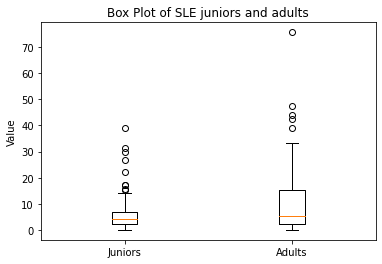

In [14]:
# Create a box plot to compare the distributions
plt.boxplot([IFN_class0, IFN_class1], labels=['Juniors', 'Adults'])
plt.title('Box Plot of SLE juniors and adults')
plt.ylabel('Value')
plt.show()


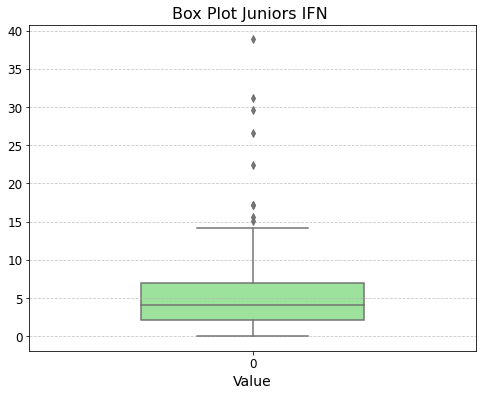

In [56]:
# Create a box plot with seaborn and pastel green colors
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.set_palette("pastel")  # Set pastel color palette
sns.boxplot(data=IFN_class0, width=0.5, linewidth=1.5, color='lightgreen')
plt.title('Box Plot Juniors IFN ', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

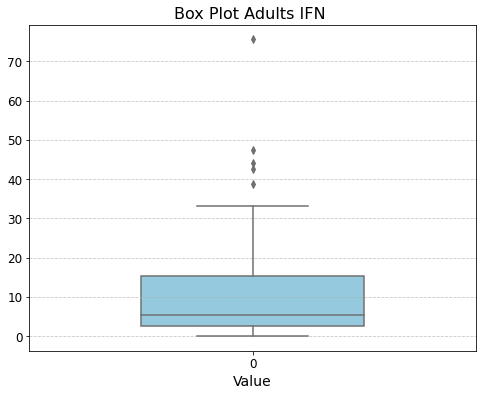

In [58]:
# Create a box plot with seaborn and pastel green colors
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.set_palette("pastel")  # Set pastel color palette
sns.boxplot(data=IFN_class1, width=0.5, linewidth=1.5, color='skyblue')
plt.title('Box Plot Adults IFN ', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

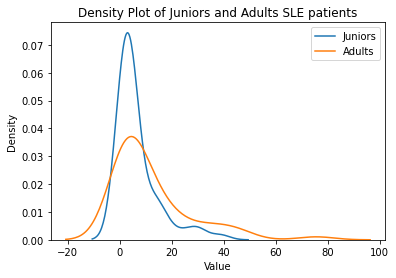

In [16]:
# Combine the two arrays
combined_data = np.concatenate([IFN_class0, IFN_class1])

# Create a density plot
sns.kdeplot(IFN_class0, label='Juniors')
sns.kdeplot(IFN_class1, label='Adults')
plt.title('Density Plot of Juniors and Adults SLE patients')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Повторим анализ для IL-6 

In [19]:
# Convert 'IL-6' to a np.array
IL6_class0 = df_class0['IL-6'].to_numpy()
IL6_class1 = df_class1['IL-6'].to_numpy()

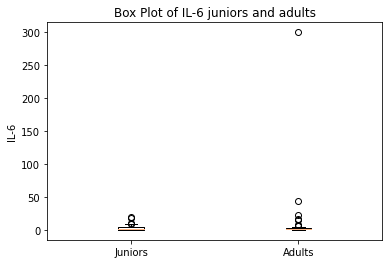

In [71]:
# Create a box plot to compare the distributions
plt.boxplot([IL6_class0, IL6_class1], labels=['Juniors', 'Adults'])
plt.title('Box Plot of IL-6 juniors and adults')
plt.ylabel('IL-6')
plt.show()

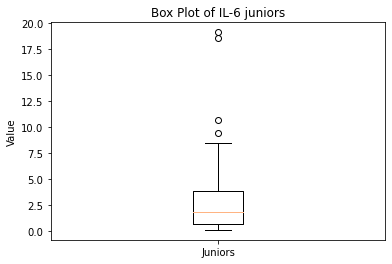

In [70]:
# Create a box plot to compare the distributions
plt.boxplot([IL6_class0], labels=['Juniors'])
plt.title('Box Plot of IL-6 juniors')
plt.ylabel('Value')
plt.show()

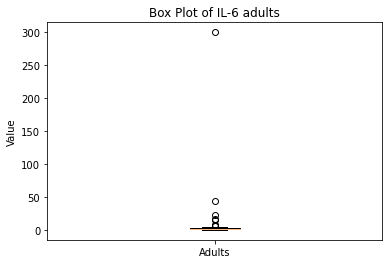

In [69]:
# Create a box plot to compare the distributions
plt.boxplot([IL6_class1], labels=['Adults'])
plt.title('Box Plot of IL-6 adults')
plt.ylabel('Value')
plt.show()

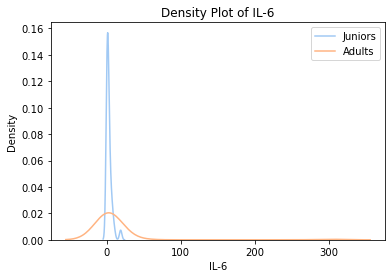

In [72]:
# Combine the two arrays
combined_data = np.concatenate([IL6_class0, IL6_class1])

# Create a density plot
sns.kdeplot(IL6_class0, label='Juniors')
sns.kdeplot(IL6_class1, label='Adults')
plt.title('Density Plot of IL-6')
plt.xlabel('IL-6')
plt.ylabel('Density')
plt.legend()
plt.show()

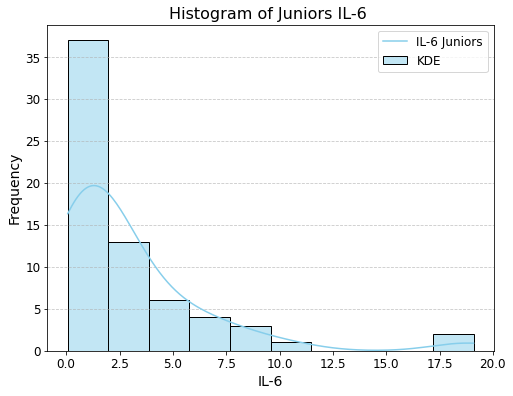

In [39]:
# Create a histogram
# Set a custom color palette for seaborn
sns.set_palette("pastel")

# Create a histogram with seaborn style
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.histplot(IL6_class0, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Juniors IL-6 ', fontsize=16)
plt.xlabel('IL-6', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the kernel density estimate (KDE)
plt.legend(['IL-6 Juniors', 'KDE'], fontsize=12)
plt.show()

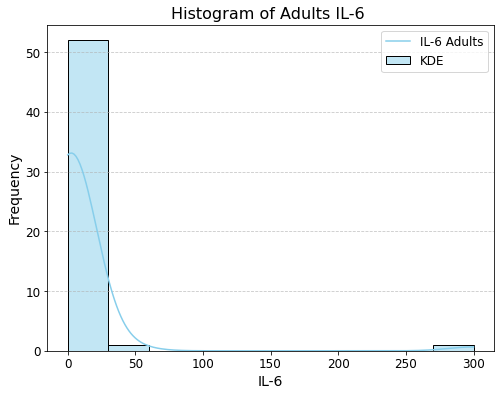

In [46]:
# Create a histogram
# Set a custom color palette for seaborn
sns.set_palette("pastel")

# Create a histogram with seaborn style
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.histplot(IL6_class1, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Adults IL-6 ', fontsize=16)
plt.xlabel('IL-6', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the kernel density estimate (KDE)
plt.legend(['IL-6 Adults', 'KDE'], fontsize=12)
plt.show()

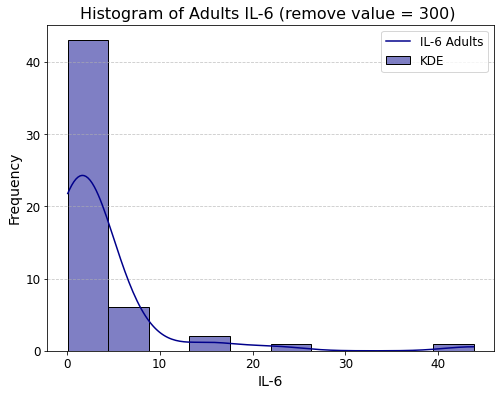

In [81]:
# Delete the value 300 from the array
IL6_class1_without_300 = np.delete(IL6_class1, np.where(IL6_class1 == 300))

# Create a histogram
# Set a custom color palette for seaborn
sns.set_palette("pastel")

# Create a histogram with seaborn style
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.histplot(IL6_class1_without_300, bins=10, kde=True, color='darkblue', edgecolor='black')
plt.title('Histogram of Adults IL-6 (remove value = 300) ', fontsize=16)
plt.xlabel('IL-6', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the kernel density estimate (KDE)
plt.legend(['IL-6 Adults', 'KDE'], fontsize=12)
plt.show()

In [35]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## Считаем среднее значение, стандартное отклонение и дисперсию для значений IL-6 для каждой выборки

### Значения для ювенильной СКВ

In [26]:
min_class0_IL6 = np.min(IL6_class0)
print(f"Min: {min_class0_IL6}")

max_class0_IL6 = np.max(IL6_class0)
print(f"Max: {max_class0_IL6}")

mean_class0_IL6 = np.mean(IL6_class0)
print(f"Mean: {mean_class0_IL6}")
  
std_class0_IL6 = np.std(IL6_class0)
print(f"std: {std_class0_IL6}")
  
variance_class0_IL6 = np.var(IL6_class0)
print(f"variance: {variance_class0_IL6}")

Min: 0.072413793
Max: 19.093
Mean: 2.9756792058484853
std: 3.725761031790181
variance: 13.881295266006235


### Значения для взрослой СКВ

In [27]:
min_class1_IL6 = np.min(IL6_class1)
print(f"Min: {min_class1_IL6}")

max_class1_IL6 = np.max(IL6_class1)
print(f"Max: {max_class1_IL6}")

mean_class1_IL6 = np.mean(IL6_class1)
print(f"Mean: {mean_class1_IL6}")
  
std_class1_IL6 = np.std(IL6_class1)
print(f"std: {std_class1_IL6}")
  
variance_class1_IL6 = np.var(IL6_class1)
print(f"variance: {variance_class1_IL6}")

Min: 0.081818182
Max: 300.0
Mean: 9.16188552188889
std: 40.528284618673744
variance: 1642.5418541322267


In [49]:
min_class1_IL6 = np.min(IL6_class1_without_300)
print(f"Min: {min_class1_IL6}")

max_class1_IL6 = np.max(IL6_class1_without_300)
print(f"Max: {max_class1_IL6}")

mean_class1_IL6 = np.mean(IL6_class1_without_300)
print(f"Mean: {mean_class1_IL6}")
  
std_class1_IL6 = np.std(IL6_class1_without_300)
print(f"std: {std_class1_IL6}")
  
variance_class1_IL6 = np.var(IL6_class1_without_300)
print(f"variance: {variance_class1_IL6}")

Min: 0.081818182
Max: 43.819
Mean: 3.674373927962264
std: 6.887880749744299
variance: 47.442901222698076


##  Результаты Welch's t-test для IL-6

In [52]:
# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(IL6_class0, IL6_class1_without_300, equal_var=False)

# Print t-test results
print(f"Welch's t-statistic: {round(t_statistic, 2)}")
print(f"Welch's p-value: {round(p_value, 2)}")

# Compare p-value to significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Welch's t-statistic: -0.66
Welch's p-value: 0.51
Fail to reject the null hypothesis: There is no significant difference between the groups.


## Повторим анализ для IL-18

In [59]:
# Convert 'IL-6' to a np.array
IL18_class0 = df_class0['IL-18'].to_numpy()
IL18_class1 = df_class1['IL-18'].to_numpy()

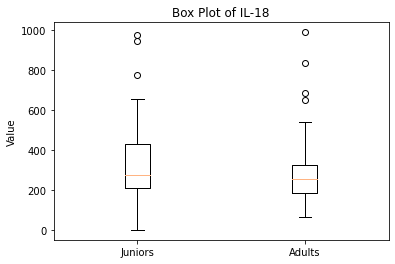

In [67]:
# Create a box plot to compare the distributions
plt.boxplot([IL18_class0, IL18_class1], labels=['Juniors', 'Adults'])
plt.title('Box Plot of IL-18')
plt.ylabel('Value')
plt.show()

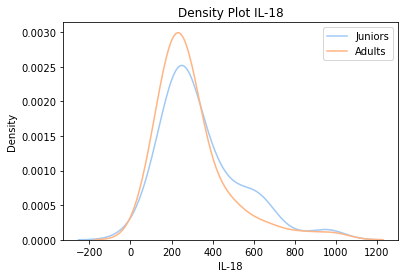

In [66]:
# Create a density plot
sns.kdeplot(IL18_class0, label='Juniors')
sns.kdeplot(IL18_class1, label='Adults')
plt.title('Density Plot IL-18')
plt.xlabel('IL-18')
plt.ylabel('Density')
plt.legend()
plt.show()

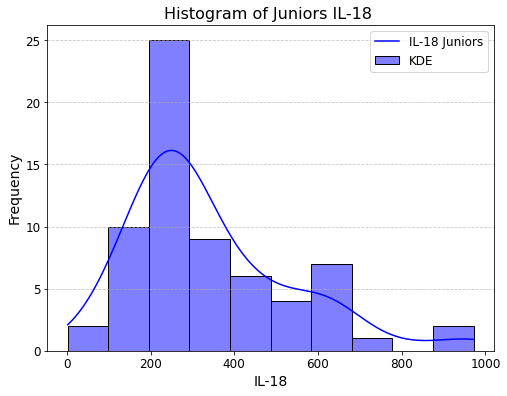

In [74]:
# Create a histogram 
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.histplot(IL18_class0, bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of Juniors IL-18 ', fontsize=16)
plt.xlabel('IL-18', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the kernel density estimate (KDE)
plt.legend(['IL-18 Juniors', 'KDE'], fontsize=12)
plt.show()

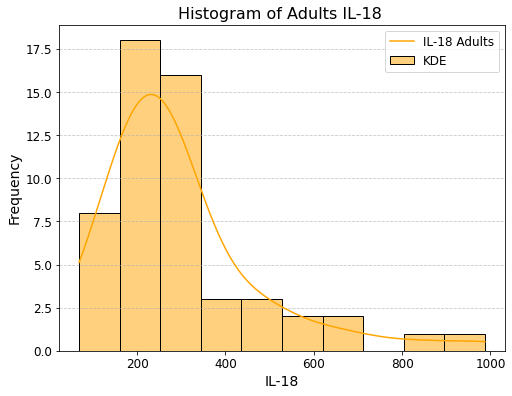

In [76]:
# Create a histogram 
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.histplot(IL18_class1, bins=10, kde=True, color='orange', edgecolor='black')
plt.title('Histogram of Adults IL-18 ', fontsize=16)
plt.xlabel('IL-18', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the kernel density estimate (KDE)
plt.legend(['IL-18 Adults', 'KDE'], fontsize=12)
plt.show()

## Считаем среднее значение, стандартное отклонение и дисперсию для значений IL-18 для каждой выборки

### Значения для ювенильной СКВ

In [78]:
min_class0_IL18 = np.min(IL18_class0)
print(f"Min: {min_class0_IL18}")

max_class0_IL18 = np.max(IL18_class0)
print(f"Max: {max_class0_IL18}")

mean_class0_IL18 = np.mean(IL18_class0)
print(f"Mean: {mean_class0_IL18}")
  
std_class0_IL18 = np.std(IL18_class0)
print(f"std: {std_class0_IL18}")
  
variance_class0_IL18 = np.var(IL18_class0)
print(f"variance: {variance_class0_IL18}")

Min: 2.153
Max: 971.5
Mean: 340.2502575757576
std: 194.81542670764586
variance: 37953.05048328214


### Значения для взрослой СКВ

In [79]:
min_class1_IL18 = np.min(IL18_class1)
print(f"Min: {min_class1_IL18}")

max_class1_IL18 = np.max(IL18_class1)
print(f"Max: {max_class1_IL18}")

mean_class1_IL18 = np.mean(IL18_class1)
print(f"Mean: {mean_class1_IL18}")
  
std_class1_IL18 = np.std(IL18_class1)
print(f"std: {std_class1_IL18}")
  
variance_class1_IL18 = np.var(IL18_class1)
print(f"variance: {variance_class1_IL18}")

Min: 68.6
Max: 987.533
Mean: 297.2923888888889
std: 176.5663725599481
variance: 31175.683918978393


In [80]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(IL18_class0, IL18_class1)

# Define significance level (alpha)
alpha = 0.05

# Print results
print(f"t-statistic: {round(t_statistic, 2)}")
print(f"p-value: {round(p_value, 2)}")

# Compare p-value to significance level
if p_value < alpha:
    print("Reject H0: There is a significant difference between the groups.")
else:
    print("Fail to reject H0: There is no significant difference between the groups.")

t-statistic: 1.24
p-value: 0.22
Fail to reject H0: There is no significant difference between the groups.
